# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 40 minutes**. For this time interval, using the values of the **7 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* TimePeriod: Time window of ten minutes.
* WT: Weather Temperature.
* WH: Weather Humidity.
* WS: Wind Speed.
* GDF: General Diffuse Flow. “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DF: DiffuseFlows

Target:

Consumption

## Dataset links:
* [DS1](https://drive.google.com/file/d/1H_scr4oTfga9Vs56CIJeSsw8kfumdTRC/view?usp=drive_link)
* [DS2](https://drive.google.com/file/d/1R3yEfuPZx3tH4HGPA-7C9pAiYJXniH_h/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the datasets

In [ ]:
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/power_consumption_g4.csv')
df2=pd.read_csv('/content/drive/MyDrive/power_consumption_g4_feat.csv')
df1

TimePeriod  Consumption
0      2017-12-02 20:10:00  36824.33460
1      2017-12-25 15:30:00  31841.82510
2      2017-05-19 21:10:00  44909.11475
3      2017-05-28 04:50:00  22964.45902
4      2017-05-08 16:10:00  33829.77049
...                    ...          ...
52411  2017-10-01 23:50:00  31138.03063
52412  2017-12-07 17:40:00  40091.25475
52413  2017-09-11 18:30:00  38930.97345
52414  2017-04-16 04:50:00  23734.42411
52415  2017-05-11 13:00:00  36599.60656

[52416 rows x 2 columns]

In [ ]:
df2

TimePeriod     WT     WH     WS      GDF       DF
0      2017-03-01 16:40:00  21.33  55.91  0.080  387.400  427.300
1      2017-07-27 06:30:00  23.10  48.58  4.908   10.450    8.630
2      2017-10-11 19:00:00  23.10  59.82  0.084    0.446    0.322
3      2017-02-10 06:50:00  12.25  80.80  4.916    0.051    0.111
4      2017-03-06 16:00:00  15.62  59.38  0.075  533.400  579.900
...                    ...    ...    ...    ...      ...      ...
52411  2017-05-14 02:20:00  23.58  43.10  0.075    0.110    0.122
52412  2017-11-17 19:20:00  17.30  76.50  0.075    0.040    0.148
52413  2017-03-21 12:10:00  17.90  50.28  0.081  837.000  296.700
52414  2017-07-28 05:10:00  25.23  61.32  4.907    0.091    0.119
52415  2017-12-16 20:30:00  13.90  80.80  0.082    0.051    0.152

[52416 rows x 6 columns]

## Merge the datasets (and pre-processing if needed)

In [ ]:
df1['TimePeriod'] = pd.to_datetime(df1['TimePeriod'])
df2['TimePeriod'] = pd.to_datetime(df2['TimePeriod'])

In [ ]:
merged_df = pd.merge(df1, df2, on='TimePeriod', how='inner')

In [ ]:
merged_df

TimePeriod  Consumption     WT     WH     WS      GDF       DF
0     2017-12-02 20:10:00  36824.33460  15.90  62.15  0.082    0.059    0.126
1     2017-12-25 15:30:00  31841.82510  17.90  45.94  0.090  327.500   61.470
2     2017-05-19 21:10:00  44909.11475  19.70  84.70  0.070    0.040    0.089
3     2017-05-28 04:50:00  22964.45902  19.31  79.90  0.073    0.051    0.104
4     2017-05-08 16:10:00  33829.77049  23.52  51.28  0.071  674.800  708.000
...                   ...          ...    ...    ...    ...      ...      ...
52411 2017-10-01 23:50:00  31138.03063  20.47  61.15  4.922    0.102    0.067
52412 2017-12-07 17:40:00  40091.25475  14.70  62.03  0.091   19.920   21.850
52413 2017-09-11 18:30:00  38930.97345  26.85  37.35  0.265  117.300   57.100
52414 2017-04-16 04:50:00  23734.42411  12.00  87.10  0.080    0.033    0.141
52415 2017-05-11 13:00:00  36599.60656  21.57  71.00  4.922  881.000  205.200

[52416 rows x 7 columns]

## Group the datasets into time intervals of 40 minutes

In [ ]:
merged_df = merged_df.set_index('TimePeriod')
merged_df = merged_df.sort_index()
merged_df

Consumption     WT    WH     WS    GDF     DF
TimePeriod                                                        
2017-01-01 00:00:00  34055.69620  6.559  73.8  0.083  0.051  0.119
2017-01-01 00:10:00  29814.68354  6.414  74.5  0.083  0.070  0.085
2017-01-01 00:20:00  29128.10127  6.313  74.5  0.080  0.062  0.100
2017-01-01 00:30:00  28228.86076  6.121  75.0  0.083  0.091  0.096
2017-01-01 00:40:00  27335.69620  5.921  75.7  0.081  0.048  0.085
...                          ...    ...   ...    ...    ...    ...
2017-12-30 23:10:00  31160.45627  7.010  72.4  0.080    NaN  0.096
2017-12-30 23:20:00  30430.41825  6.947  72.6  0.082  0.051  0.093
2017-12-30 23:30:00  29590.87452  6.900  72.8  0.086  0.084  0.074
2017-12-30 23:40:00  28958.17490  6.758  73.0  0.080  0.066  0.089
2017-12-30 23:50:00  28349.80989  6.580  74.1  0.081  0.062  0.111

[52416 rows x 6 columns]

In [ ]:
resampled_df = merged_df.resample('40T').mean() #T e za minuta spored minutata da se prai
resampled_df
#'Y': Year
#'M': Month
#'D': Day
#'H': Hour

Consumption       WT         WH       WS      GDF  \
TimePeriod                                                                
2017-01-01 00:00:00  30306.835442  6.35175  74.450000  0.08225  0.06850   
2017-01-01 00:40:00  26351.392405  5.68600  76.766667  0.08175  0.05250   
2017-01-01 01:20:00  24124.556962  5.53900  77.400000  0.08175  0.05950   
2017-01-01 02:00:00  22332.151897  4.97475  78.850000  0.08275  0.06625   
2017-01-01 02:40:00  21318.987340  5.16925  78.450000  0.08250  0.05750   
...                           ...      ...        ...      ...      ...   
2017-12-30 20:40:00  36419.771862  8.83750  66.022500  0.08300  0.07325   
2017-12-30 21:20:00  34993.155892  7.84500  70.682500  0.08175  0.07225   
2017-12-30 22:00:00  34439.543728  7.71500  69.922500  0.08200  0.06225   
2017-12-30 22:40:00  32380.228135  7.20250  71.775000  0.08075  0.05400   
2017-12-30 23:20:00  29332.319390  6.79625  73.125000  0.08225  0.06575   

                          DF  
TimePeriod                    
2017-01-01 00:00:00  0.10000  
2017-01-01 00:40:00  0.09550  
2017-01-01 01:20:00  0.12150  
2017-01-01 02:00:00  0.11950  
2017-01-01 02:40:00  0.13375  
...                      ...  
2017-12-30 20:40:00  0.10575  
2017-12-30 21:20:00  0.08525  
2017-12-30 22:00:00  0.10750  
2017-12-30 22:40:00  0.10200  
2017-12-30 23:20:00  0.09175  

[13104 rows x 6 columns]

## Create lags

In [ ]:
lag=7
columns = resampled_df.columns
for i in range(1, lag+1):
  for col in columns:
    resampled_df[f'{col}_prev_{i}'] = resampled_df[col].shift(i)

In [ ]:
resampled_df

Consumption       WT         WH       WS      GDF  \
TimePeriod                                                                
2017-01-01 00:00:00  30306.835442  6.35175  74.450000  0.08225  0.06850   
2017-01-01 00:40:00  26351.392405  5.68600  76.766667  0.08175  0.05250   
2017-01-01 01:20:00  24124.556962  5.53900  77.400000  0.08175  0.05950   
2017-01-01 02:00:00  22332.151897  4.97475  78.850000  0.08275  0.06625   
2017-01-01 02:40:00  21318.987340  5.16925  78.450000  0.08250  0.05750   
...                           ...      ...        ...      ...      ...   
2017-12-30 20:40:00  36419.771862  8.83750  66.022500  0.08300  0.07325   
2017-12-30 21:20:00  34993.155892  7.84500  70.682500  0.08175  0.07225   
2017-12-30 22:00:00  34439.543728  7.71500  69.922500  0.08200  0.06225   
2017-12-30 22:40:00  32380.228135  7.20250  71.775000  0.08075  0.05400   
2017-12-30 23:20:00  29332.319390  6.79625  73.125000  0.08225  0.06575   

                          DF  Consumption_prev_1  WT_prev_1  WH_prev_1  \
TimePeriod                                                               
2017-01-01 00:00:00  0.10000                 NaN        NaN        NaN   
2017-01-01 00:40:00  0.09550        30306.835442    6.35175  74.450000   
2017-01-01 01:20:00  0.12150        26351.392405    5.68600  76.766667   
2017-01-01 02:00:00  0.11950        24124.556962    5.53900  77.400000   
2017-01-01 02:40:00  0.13375        22332.151897    4.97475  78.850000   
...                      ...                 ...        ...        ...   
2017-12-30 20:40:00  0.10575        37137.642585    8.89750  63.792500   
2017-12-30 21:20:00  0.08525        36419.771862    8.83750  66.022500   
2017-12-30 22:00:00  0.10750        34993.155892    7.84500  70.682500   
2017-12-30 22:40:00  0.10200        34439.543728    7.71500  69.922500   
2017-12-30 23:20:00  0.09175        32380.228135    7.20250  71.775000   

                     WS_prev_1  ...  WH_prev_6  WS_prev_6  GDF_prev_6  \
TimePeriod                      ...                                     
2017-01-01 00:00:00        NaN  ...        NaN        NaN         NaN   
2017-01-01 00:40:00    0.08225  ...        NaN        NaN         NaN   
2017-01-01 01:20:00    0.08175  ...        NaN        NaN         NaN   
2017-01-01 02:00:00    0.08175  ...        NaN        NaN         NaN   
2017-01-01 02:40:00    0.08275  ...        NaN        NaN         NaN   
...                        ...  ...        ...        ...         ...   
2017-12-30 20:40:00    0.07800  ...  41.695000    0.07775   152.40000   
2017-12-30 21:20:00    0.08300  ...  45.870000    0.07825    58.06500   
2017-12-30 22:00:00    0.08175  ...  57.295000    0.07625     4.73925   
2017-12-30 22:40:00    0.08200  ...  60.636667    0.07525     0.06425   
2017-12-30 23:20:00    0.08075  ...  62.885000    0.07525     0.05325   

                     DF_prev_6  Consumption_prev_7  WT_prev_7  WH_prev_7  \
TimePeriod                                                                 
2017-01-01 00:00:00        NaN                 NaN        NaN        NaN   
2017-01-01 00:40:00        NaN                 NaN        NaN        NaN   
2017-01-01 01:20:00        NaN                 NaN        NaN        NaN   
2017-01-01 02:00:00        NaN                 NaN        NaN        NaN   
2017-01-01 02:40:00        NaN                 NaN        NaN        NaN   
...                        ...                 ...        ...        ...   
2017-12-30 20:40:00  186.90000        28209.885933    14.2800  41.780000   
2017-12-30 21:20:00   73.95500        29700.380230    14.1650  41.695000   
2017-12-30 22:00:00    4.81250        35878.326995    13.6000  45.870000   
2017-12-30 22:40:00    0.11850        38022.813690    11.0725  57.295000   
2017-12-30 23:20:00    0.09925        37718.631180     9.9925  60.636667   

                     WS_prev_7  GDF_prev_7  DF_prev_7  
TimePeriod                                             
2017-01-01 00:00:00        NaN  

In [ ]:
resampled_df.isnull().sum()

Consumption            0
WT                     6
WH                     0
WS                     6
GDF                    0
DF                     0
Consumption_prev_1     1
WT_prev_1              7
WH_prev_1              1
WS_prev_1              7
GDF_prev_1             1
DF_prev_1              1
Consumption_prev_2     2
WT_prev_2              8
WH_prev_2              2
WS_prev_2              8
GDF_prev_2             2
DF_prev_2              2
Consumption_prev_3     3
WT_prev_3              9
WH_prev_3              3
WS_prev_3              9
GDF_prev_3             3
DF_prev_3              3
Consumption_prev_4     4
WT_prev_4             10
WH_prev_4              4
WS_prev_4             10
GDF_prev_4             4
DF_prev_4              4
Consumption_prev_5     5
WT_prev_5             11
WH_prev_5              5
WS_prev_5             11
GDF_prev_5             5
DF_prev_5              5
Consumption_prev_6     6
WT_prev_6             12
WH_prev_6              6
WS_prev_6             12


In [ ]:
data=resampled_df
data = data.dropna(axis=0)

In [ ]:
features = data.columns.drop(['Consumption', 'WT', 'WH', 'WS', 'GDF','DF'])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split the dataset into 80% training and 20% testing datasets

In [ ]:
X, Y = data[features], data['Consumption']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Create the model, pre-process the data and make it suitable for training

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [ ]:
params = {
    "n_estimators": np.arange(50, 500, 100),
    "max_depth": [3, 5, 7]
}

## Perofrm hyper-parameter optimization with a 5-fold cross validation.

Important: Do not use many values for the hyper-parameters due to time constraints.

KEEP IN MIND THE DATASET IS TIME-SERIES.

In [ ]:
grid_search = GridSearchCV(XGBRegressor(), cv=TimeSeriesSplit(5), param_grid=params)

In [ ]:
grid_search.fit(X, Y, verbose=2)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': array([ 50, 150, 250, 350, 450])})

## Fit the model with the best parameters on the training dataset

In [ ]:
estimator = grid_search.best_estimator_
estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
estimator.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = estimator.predict(X_test)

## Calculate the adequate metrics on the testing dataset

In [ ]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(1196896.6643734635, 802.7574761826262, 0.9684841982317185)

## Visualize the targets against the predictions

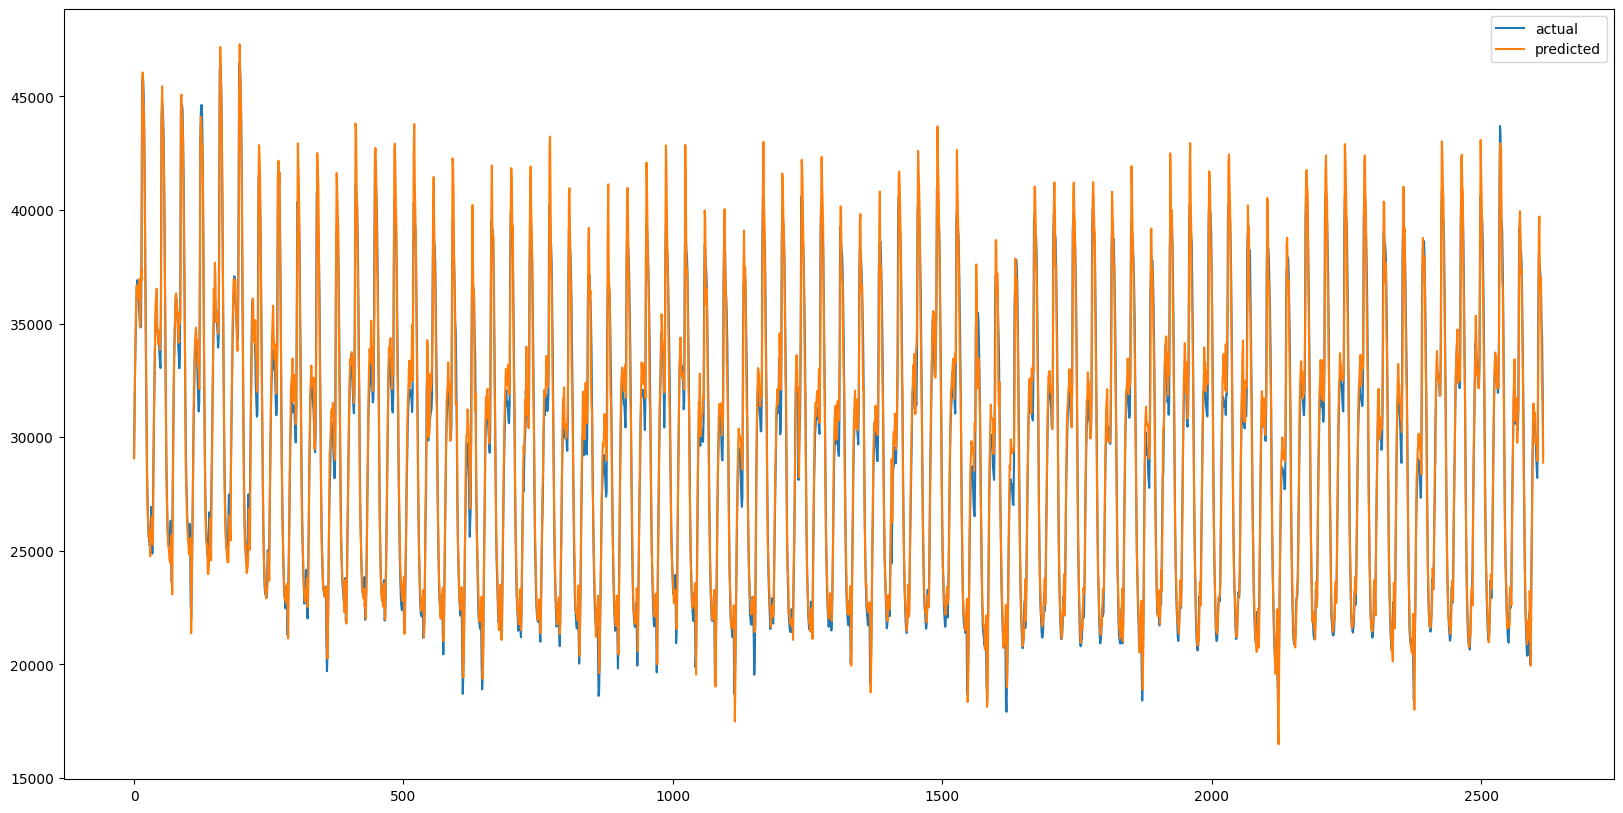

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()